=== Sample Data ===
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]

=== Evaluation Metrics ===
Accuracy : 0.77
Precision: 0.66
Recall   : 0.47
F1 Score : 0.55
AUC      : 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       209
      

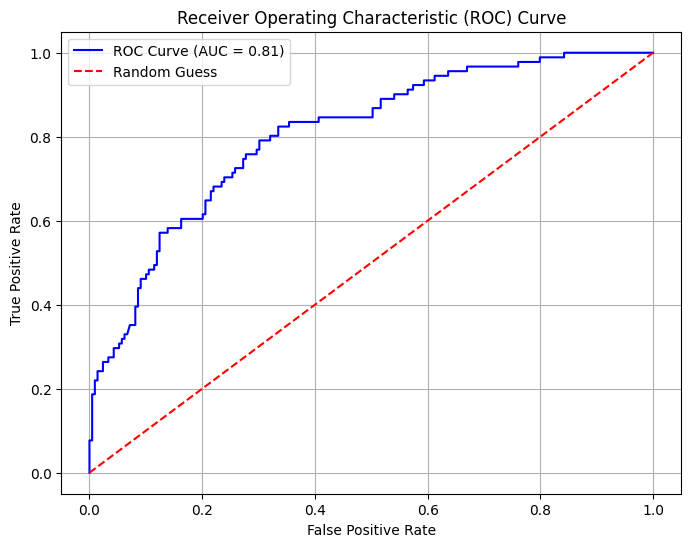

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Membaca file CSV
file_path = 'CreditDataset.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris data untuk memahami strukturnya
print("=== Sample Data ===")
print(data.head())

# Mengidentifikasi kolom target (asumsi target ada pada kolom terakhir)
target_column = data.columns[-1]

# Mengonversi target ke dalam format biner (jika diperlukan)
data[target_column] = data[target_column].astype(str).str.strip().str.lower()
if data[target_column].nunique() > 2:
    print("Target memiliki lebih dari dua kelas. Lakukan multi-kelas jika diperlukan.")
else:
    data[target_column] = LabelEncoder().fit_transform(data[target_column])

# Membagi fitur dan target
X = data.drop(columns=[target_column])
y = data[target_column]

# Encoding data kategoris (jika ada)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model SVM
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Menampilkan hasil
print("\n=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
